<div style="font-family: Trebuchet MS; background-color: #00203FFF; color: #ADEFD1FF; padding: 12px; line-height: 1.3; text-align: center;">Heart Disease Analysis</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
  <b>Importing libraries</b> 
</div>

<div style="font-family: Trebuchet MS; background-color: #00203FFF; color: #ADEFD1FF; padding: 48px; line-height: 1.3;">
  Data analysis and EDA are important tools for understanding and exploring the characteristics of a dataset. When applied to a dataset about heart disease, data analysis and EDA can provide insights into factors that are associated with an increased risk of heart disease, such as age, sex, and blood pressure. By using visualization techniques and statistical methods, patterns and trends in the data can be uncovered, and relationships between variables can be analyzed and used to make predictions. Through data analysis and EDA, it is possible to gain a deeper understanding of heart disease and inform the development of strategies for preventing and treating it.
</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify; font-size: bigger">
  <b>intro </b> 
</div>


<div style="font-family: Trebuchet MS; background-color: #00203FFF; color: #ADEFD1FF; padding: 12px; line-height: 1.3;">
  <div style="font-family: Segoe UI; line-height: 2; color: #ADEFD1FF; text-align: justify">
    <b>Dataset columns - </b> 
  </div>
  <hr>
  <ul>
    <li>**Sex** : sex of the patient [M: Male, F: Female]</li>
    <li>**ChestPainType** : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</li>
    <li>**RestingBP** : resting blood pressure [mm Hg]</li>
    <li>**Cholesterol** : serum cholesterol [mm/dl]</li>
    <li>**FastingBS** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</li>
    <li>**RestingECG** : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</li>
    <li>**MaxHR** : maximum heart rate achieved [Numeric value between 60 and 202]</li>
    <li>**ExerciseAngina** : exercise-induced angina [Y: Yes, N: No]</li>
    <li>**Oldpeak** : oldpeak = ST [Numeric value measured in depression]</li>
    <li>**ST_Slope** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</li>
    <li>**HeartDisease** : output class [1: heart disease, 0: Normal]</li>
  </ul>
</div>


# <div style="font-family: Trebuchet MS; background-color: #00203FFF; color: #ADEFD1FF; padding: 12px; line-height: 1;">Importing Libraries </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
     <b>Importing libraries</b> that will be used in this notebook.
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings("ignore")



In [2]:
f = pd.read_csv('heart.csv')

In [3]:
f.rename(columns = {'cp':'chestpain','trestbps':'restingBP','fbs':'fastingBS','thalach':'MaxHrtRate','oldpeak':'stDepress','ca':'majorVassel','thal':'thlmus','target':'disease'},inplace=True)
f.head(5)

,age,sex,chestpain,restingBP,chol,fastingBS,restecg,MaxHrtRate,exang,stDepress,slope,majorVassel,thlmus,disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
print(f.shape)
print(f.info())

(1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1025 non-null   int64  
 1   sex          1025 non-null   int64  
 2   chestpain    1025 non-null   int64  
 3   restingBP    1025 non-null   int64  
 4   chol         1025 non-null   int64  
 5   fastingBS    1025 non-null   int64  
 6   restecg      1025 non-null   int64  
 7   MaxHrtRate   1025 non-null   int64  
 8   exang        1025 non-null   int64  
 9   stDepress    1025 non-null   float64
 10  slope        1025 non-null   int64  
 11  majorVassel  1025 non-null   int64  
 12  thlmus       1025 non-null   int64  
 13  disease      1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [5]:
#Identify the categorical and numerical columns
category = []
numerical = []
for i in f.columns:
    if f[i].nunique() <= 5:
        f[i] = f[i].astype('category')
        category.append(i)
    else:
        numerical.append(i)

print(f'categorical features are {category}')
print(f'numerical features are {numerical}')

#Find unique values for each categorical column
[(i,f[i].unique()) for i in category]

categorical features are ['sex', 'chestpain', 'fastingBS', 'restecg', 'exang', 'slope', 'majorVassel', 'thlmus', 'disease']
numerical features are ['age', 'restingBP', 'chol', 'MaxHrtRate', 'stDepress']


[('sex',
  [1, 0]
  Categories (2, int64): [0, 1]),
 ('chestpain',
  [0, 1, 2, 3]
  Categories (4, int64): [0, 1, 2, 3]),
 ('fastingBS',
  [0, 1]
  Categories (2, int64): [0, 1]),
 ('restecg',
  [1, 0, 2]
  Categories (3, int64): [0, 1, 2]),
 ('exang',
  [0, 1]
  Categories (2, int64): [0, 1]),
 ('slope',
  [2, 0, 1]
  Categories (3, int64): [0, 1, 2]),
 ('majorVassel',
  [2, 0, 1, 3, 4]
  Categories (5, int64): [0, 1, 2, 3, 4]),
 ('thlmus',
  [3, 2, 1, 0]
  Categories (4, int64): [0, 1, 2, 3]),
 ('disease',
  [0, 1]
  Categories (2, int64): [0, 1])]

In [6]:
f['sex'] = f['sex'].apply(lambda x : 'male' if x == 1 else 'female' )
f['chestpain'] = f['chestpain'].apply(lambda x : 'TA' if x == 1 else 'AA' if x == 2 else 'NA' if x == 3 else 'ASY')
f['fastingBS'] = f['fastingBS'].apply(lambda x : 'yes' if x == 1 else 'no')
f['restecg'] = f['restecg'].apply(lambda x : 'NRML' if x == 0 else 'ABNRML' if x == 1 else 'PROBABLE' )
f['exang'] = f['exang'].apply(lambda x : 'yes' if x == 1 else 'no')
f['slope'] = f['slope'].apply(lambda x : 'UP' if x == 0 else 'FLT' if x == 1 else 'DWN')
f['disease'] = f['disease'].apply(lambda x : 'No' if x == 0 else 'Yes')

In [7]:
f.dtypes

age               int64
sex            category
chestpain      category
restingBP         int64
chol              int64
fastingBS      category
restecg        category
MaxHrtRate        int64
exang          category
stDepress       float64
slope          category
majorVassel    category
thlmus         category
disease        category
dtype: object

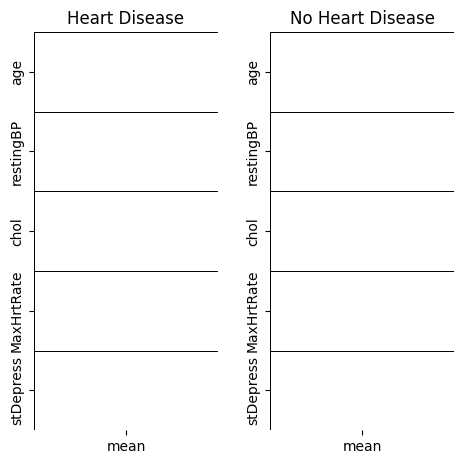

In [8]:
dis = f[f['disease'] == 1].describe().T
no_dis = f[f['disease'] == 0].describe().T
colors = ['#00203FFF','#ADEFD1FF']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(dis[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no_dis[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

# <div style="font-family: Trebuchet MS; background-color: #00203FFF; color: #ADEFD1FF; padding: 12px; line-height: 1;">Univariate Analysis for each column </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
     <b>Importing libraries</b> that will be used in this notebook.
</div>

# <div style="font-family: Trebuchet MS; background-color: #00203FFF; color: #ADEFD1FF; padding: 12px; line-height: 1;">Start with categorical columns (Univariate Analysis)</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
     <b>Importing libraries</b> that will be used in this notebook.
</div>

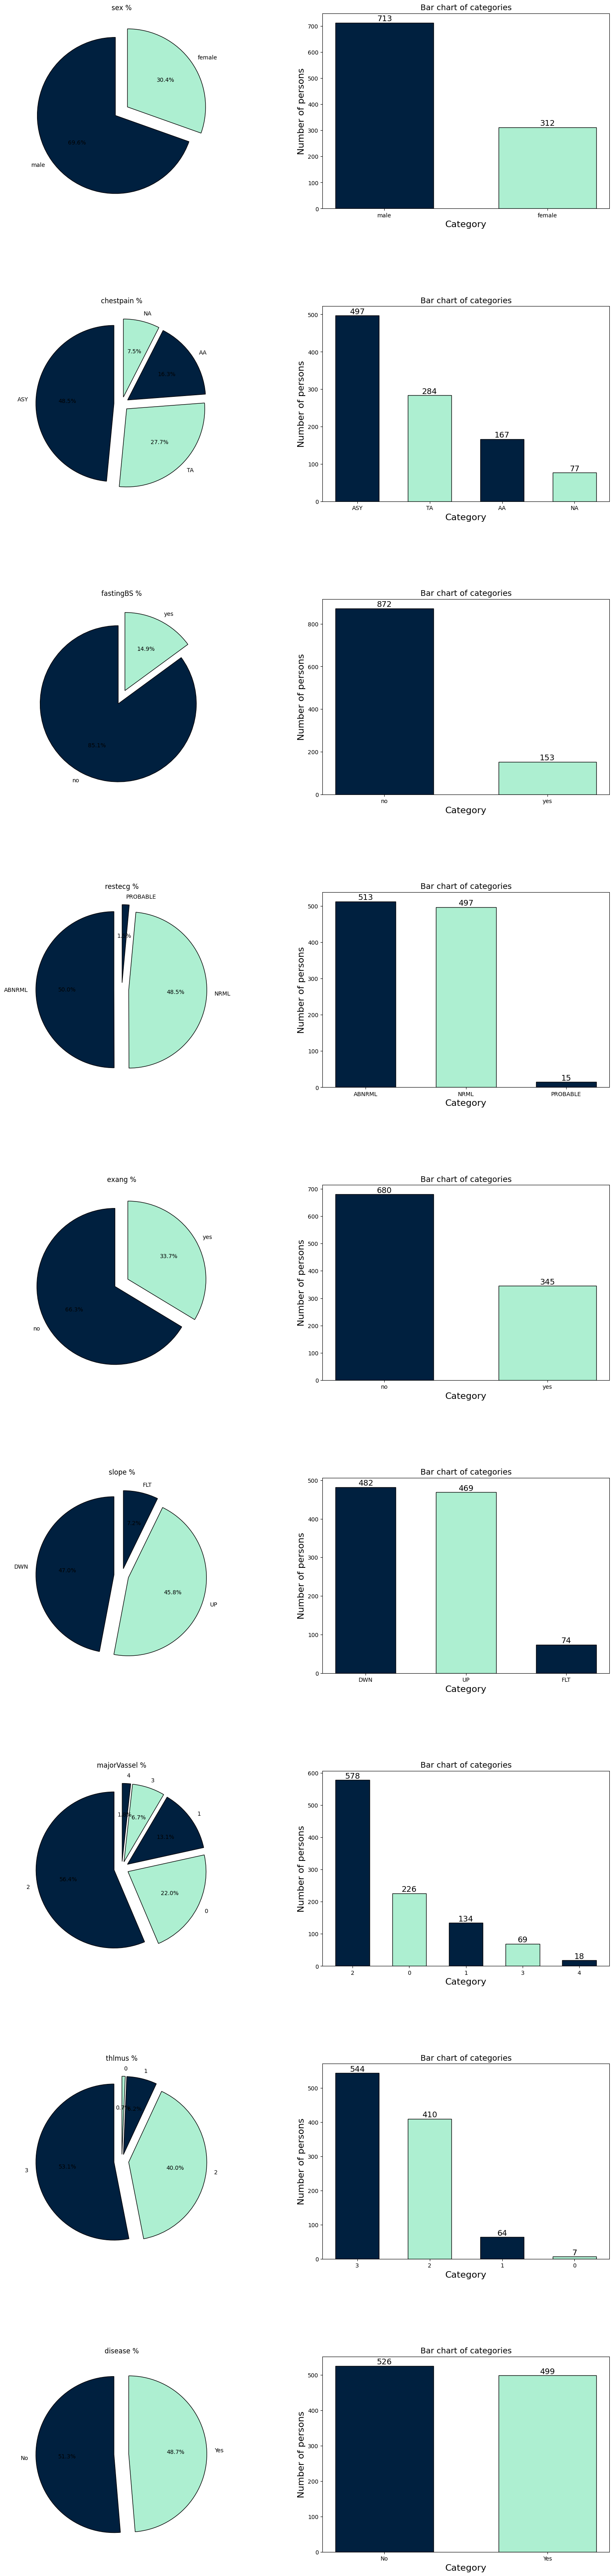

In [9]:
# First, create a list of the column names you want to plot
column_names = category

# Set the number of rows and columns for the subplots
nrows = len(column_names)
ncols = 2

# Set the figure size
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 9*nrows))


plt.subplots_adjust(hspace=0.5)


# Iterate through each column
for i, col in enumerate(column_names):
    # Get the value counts for the column
    l = list(f[col].value_counts())
    
    # Get the unique values for the column
    unique_values = f[col].unique()
    
    # Create the labels for the pie chart and bar chart
    labels = [str(val) for val in unique_values]
    
    # Set the explode list to a list of zeros with the same length as the number of unique values
    explode = [0.089] * len(unique_values)
    
    # Set the value for the slice you want to pull out to a non-zero value
    explode[0] = 0.1
    
    # Calculate the percentage of each value
    circ = [l[i] / sum(l) * 100 for i in range(len(l))]
    
    # Plot the pie chart
    plt.subplot(nrows, ncols, i*2+1)
    plt.pie(circ, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
    plt.title(f'{col} %')
    
    # Plot the bar chart
    plt.subplot(nrows, ncols, i*2+2)
    plt.bar(labels, l, width=0.6, color=colors, edgecolor='black')
    plt.xlabel('Category', fontsize=16)
    plt.ylabel('Number of persons', fontsize=16)
    plt.title('Bar chart of categories', fontsize=14)
    for i, v in enumerate(l):
        plt.text(i, v, str(v), fontsize=14, color='black', ha='center', va='bottom')

plt.show()

# <div style="font-family: Trebuchet MS; background-color: #00203FFF; color: #ADEFD1FF; padding: 12px; line-height: 1;">Start with Numerical columns (Univariate Analysis)</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
     <b>Importing libraries</b> that will be used in this notebook.
</div>

In [10]:
len(numerical)

5

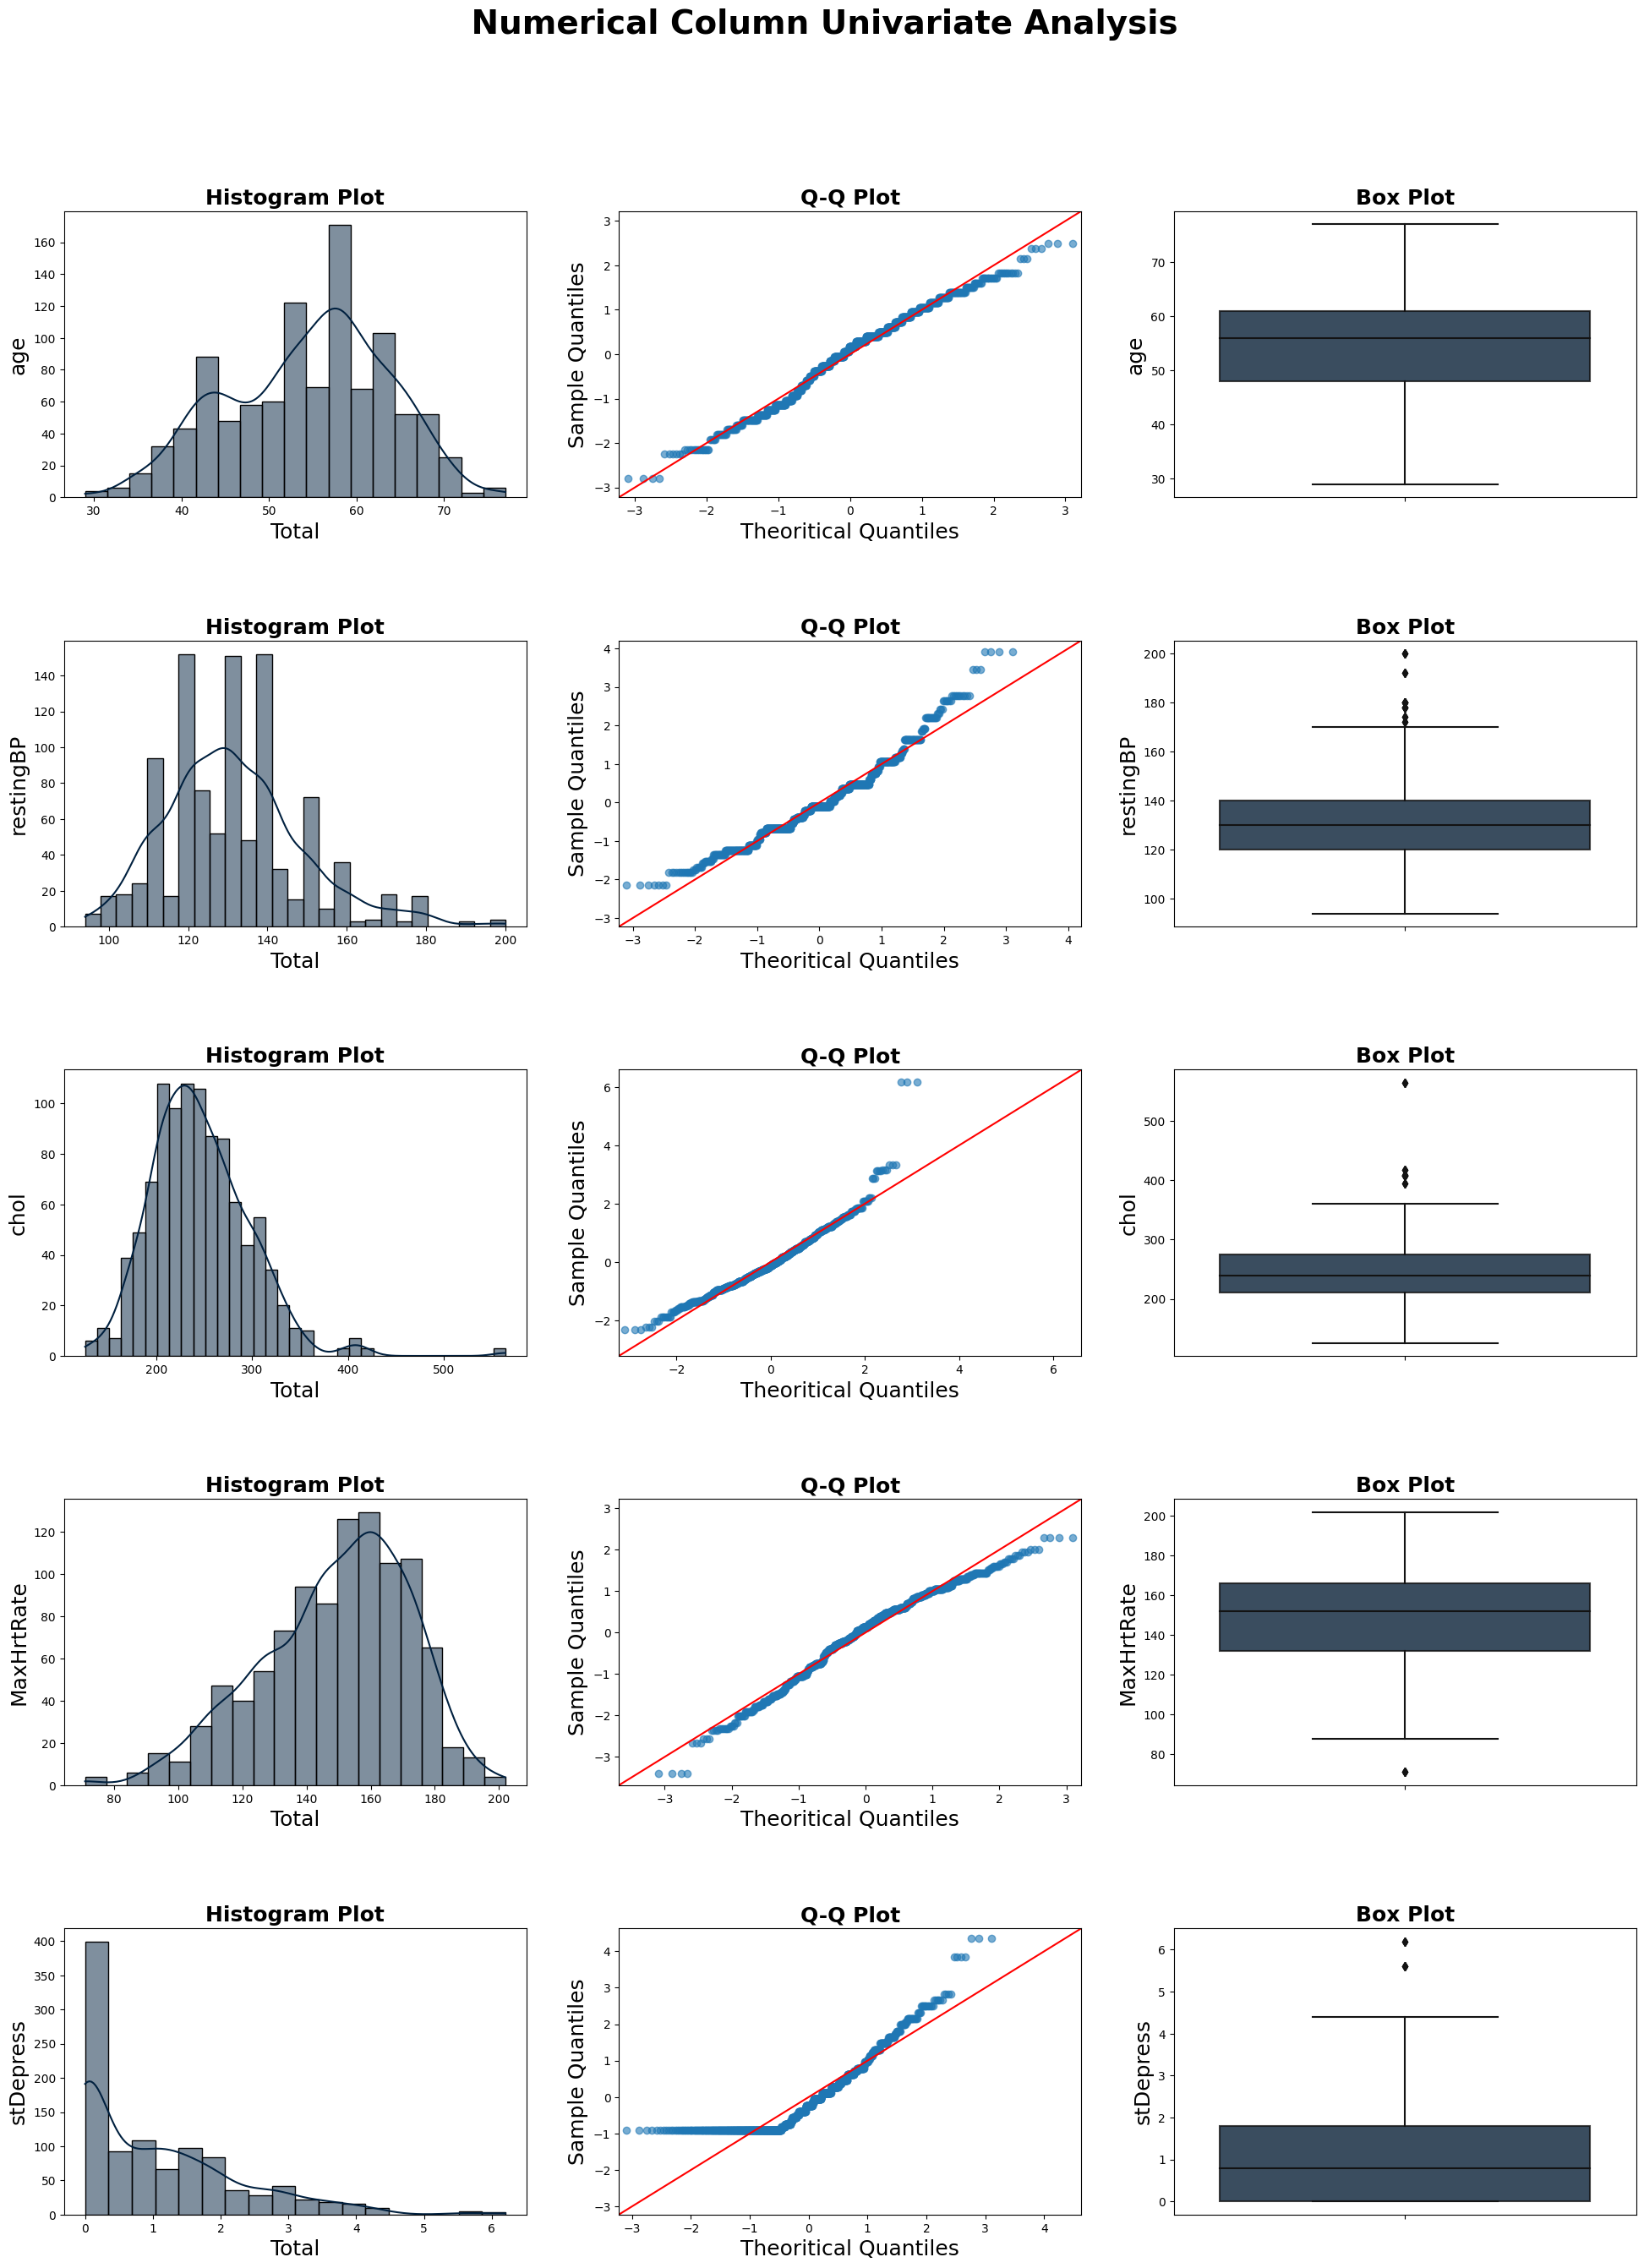

In [11]:
# List of columns in the dataframe
column_list = numerical

color1 = '#00203FFF'
color2 = '#ADEFD1FF'

# Number of rows and columns in the subplot grid
nrows = len(numerical)
ncols = 3

# Create a figure and a subplot grid
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, 30))

plt.subplots_adjust(hspace=0.5)

# Loop over each column
for i, var in enumerate(column_list):
  # Get the subplot axes for the current column
  hist_ax = ax[i][0]
  qq_ax = ax[i][1]
  box_ax = ax[i][2]

  '''# Skewness and kurtosis of the current column
  skew = f[var].skew(axis=0, skipna=True)
  kurt = f[var].kurt(axis=0, skipna=True)

  # Print skewness and kurtosis of the current column
  print(f'\033[1m' + '.: {var} Column Skewness & Kurtosis :.' + '\033[0m')
  print('*' * 40)
  print('Skewness:' + '\033[1m {:.3f}'.format(skew))
  print('\033[0m' + 'Kurtosis:' + '\033[1m {:.3f}'.format(kurt))
  print('\n')'''

  # Title for the figure
  fig.suptitle(f' Numerical Column Univariate Analysis ', fontweight='bold', fontsize=28,
               fontfamily='sans-serif')
  fig.subplots_adjust(top=0.9)

  # Histogram plot
  hist_ax.set_title('Histogram Plot', fontweight='bold', fontsize=18,
                    fontfamily='sans-serif')
  sns.histplot(data=f, x=var, kde=True, color=color1, ax=hist_ax)
  hist_ax.set_xlabel('Total', fontweight='regular', fontsize=18,
                     fontfamily='sans-serif')
  hist_ax.set_ylabel(var, fontweight='regular', fontsize=18, fontfamily='sans-serif')

  # Q-Q plot
  qq_ax.set_title('Q-Q Plot', fontweight='bold', fontsize=18,
                  fontfamily='sans-serif')
  qqplot(f[var], fit=True, line='45', ax=qq_ax, alpha=0.6, color=color2)
  qq_ax.set_xlabel('Theoritical Quantiles', fontweight='regular', fontsize=18,
                   fontfamily='sans-serif')
  qq_ax.set_ylabel('Sample Quantiles', fontweight='regular', fontsize=18,
                   fontfamily='sans-serif')

  # Box plot
  box_ax.set_title('Box Plot', fontweight='bold', fontsize=18, fontfamily='sans-serif')
  sns.boxplot(data=f, y=var, boxprops=dict(alpha=0.8), linewidth=1.5, color=color1, ax=box_ax)
  box_ax.set_ylabel(var, fontweight='regular', fontsize=18, fontfamily='sans-serif')
plt.show()


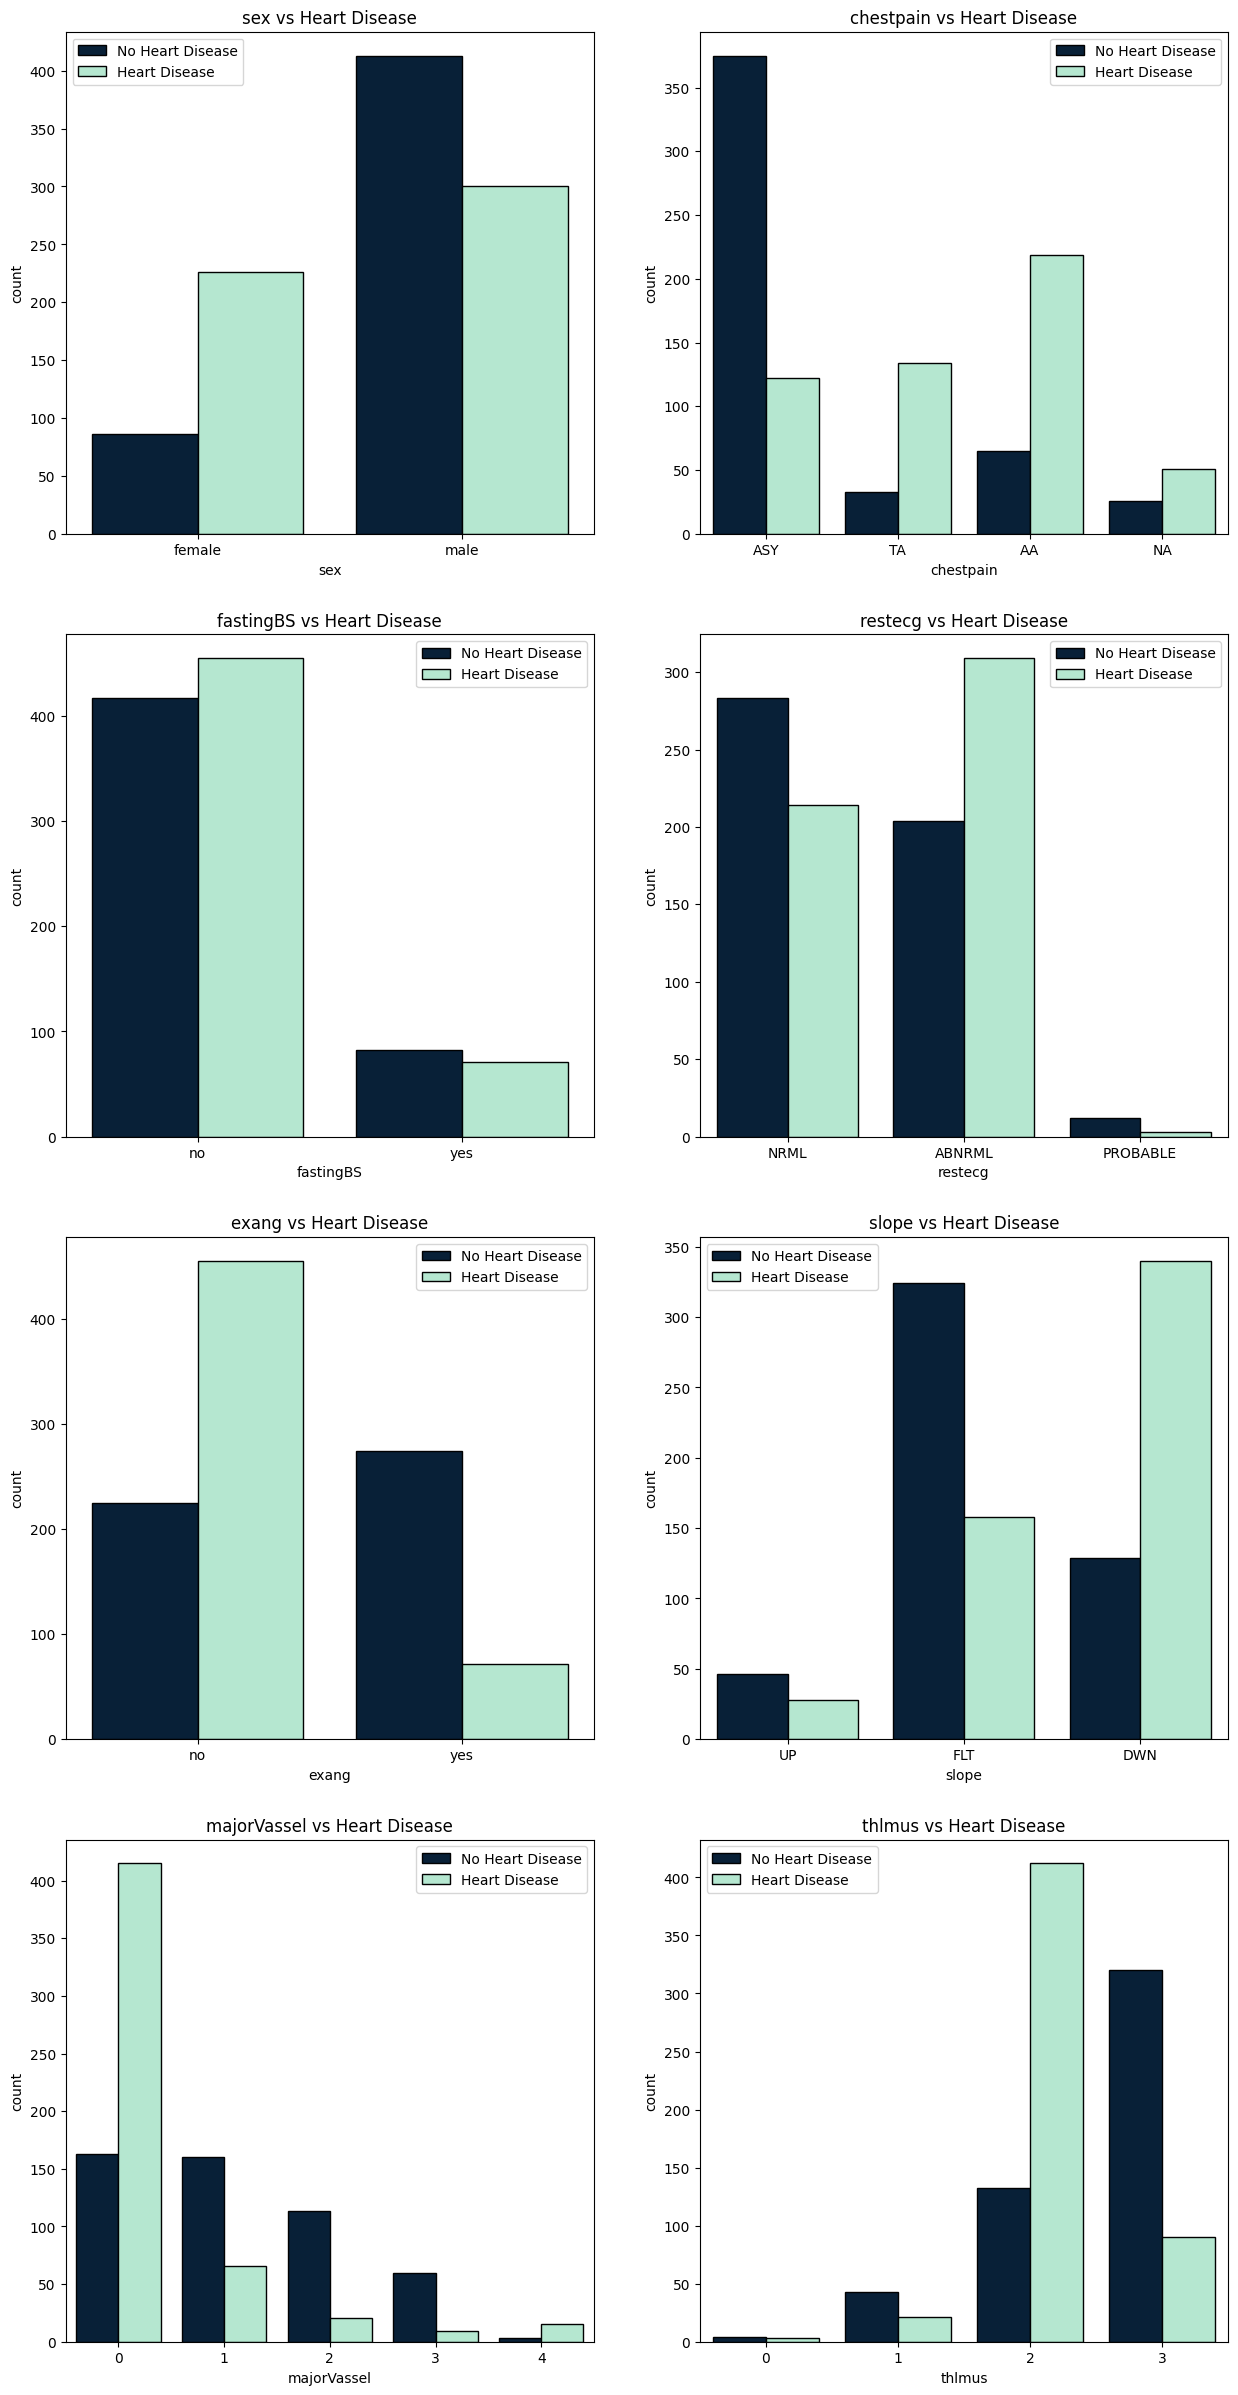

In [33]:
#Relation of categorical to disease varibale - 
fig, ax = plt.subplots(nrows = 4,ncols = 2,figsize = (15,30))
for i in range(len(category) - 1):
    plt.subplot(4,2,i+1)
    sns.countplot(data = f,x = category[i], hue = f['disease'],palette = colors, edgecolor = 'black')
    title = category[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title)

In [19]:
numerical

['age', 'restingBP', 'chol', 'MaxHrtRate', 'stDepress']

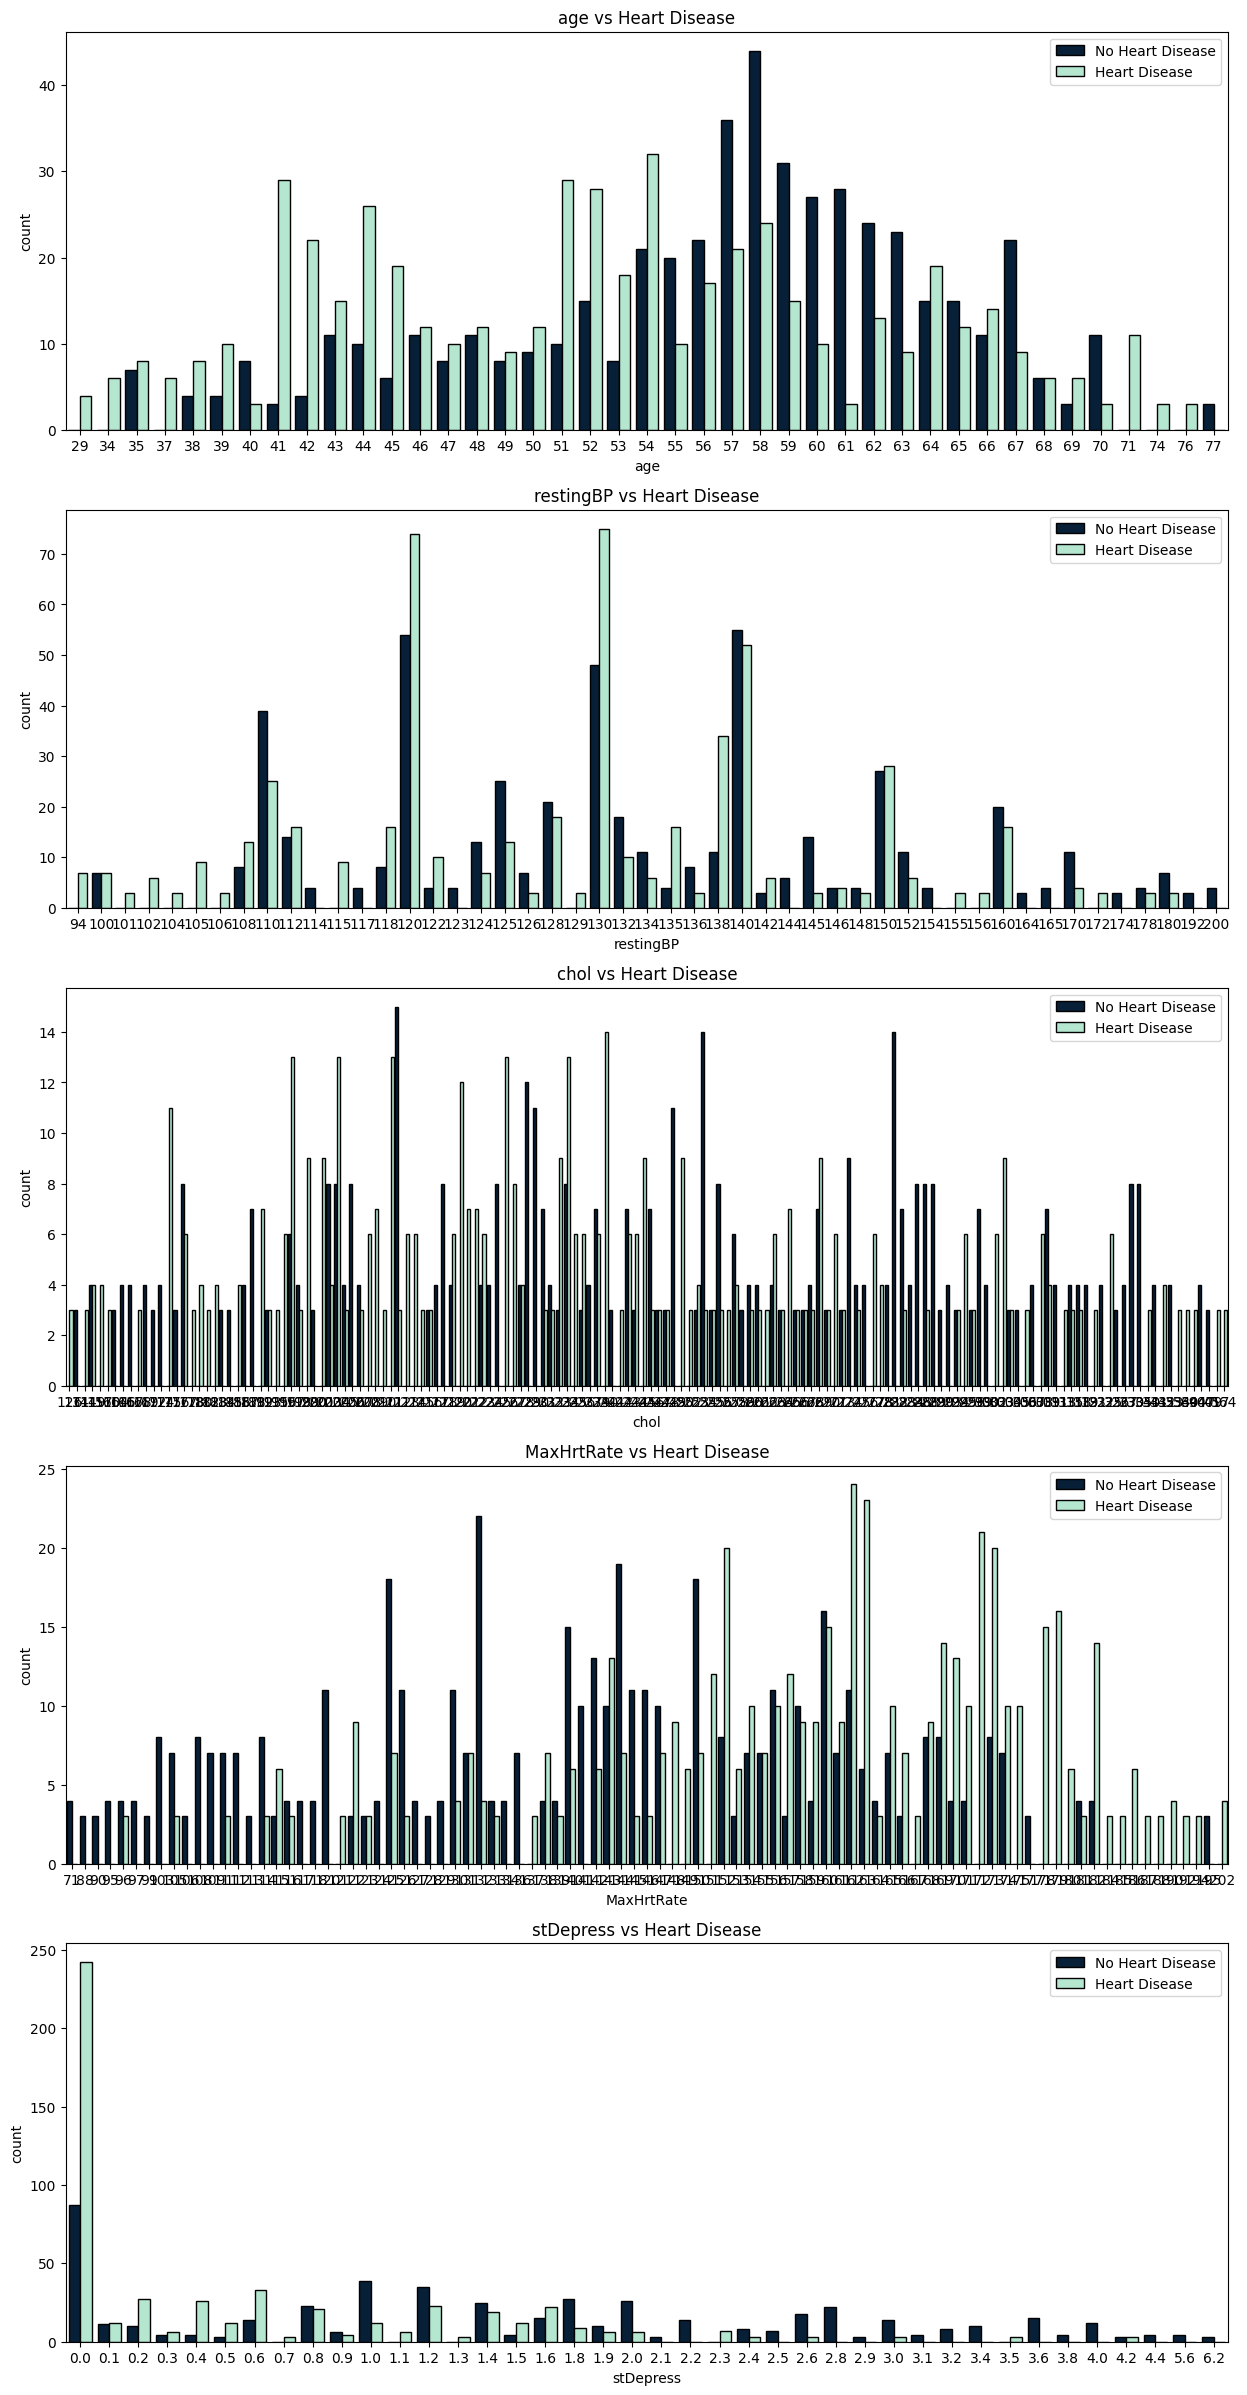

In [31]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,30))
for i in range(len(numerical)):
    plt.subplot(5,1,i+1)
    sns.countplot(data = f,x = numerical[i], hue = f['disease'],palette = colors, edgecolor = 'black')
    title = numerical[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title)

In [44]:
category

['sex',
 'chestpain',
 'fastingBS',
 'restecg',
 'exang',
 'slope',
 'majorVassel',
 'thlmus',
 'disease']

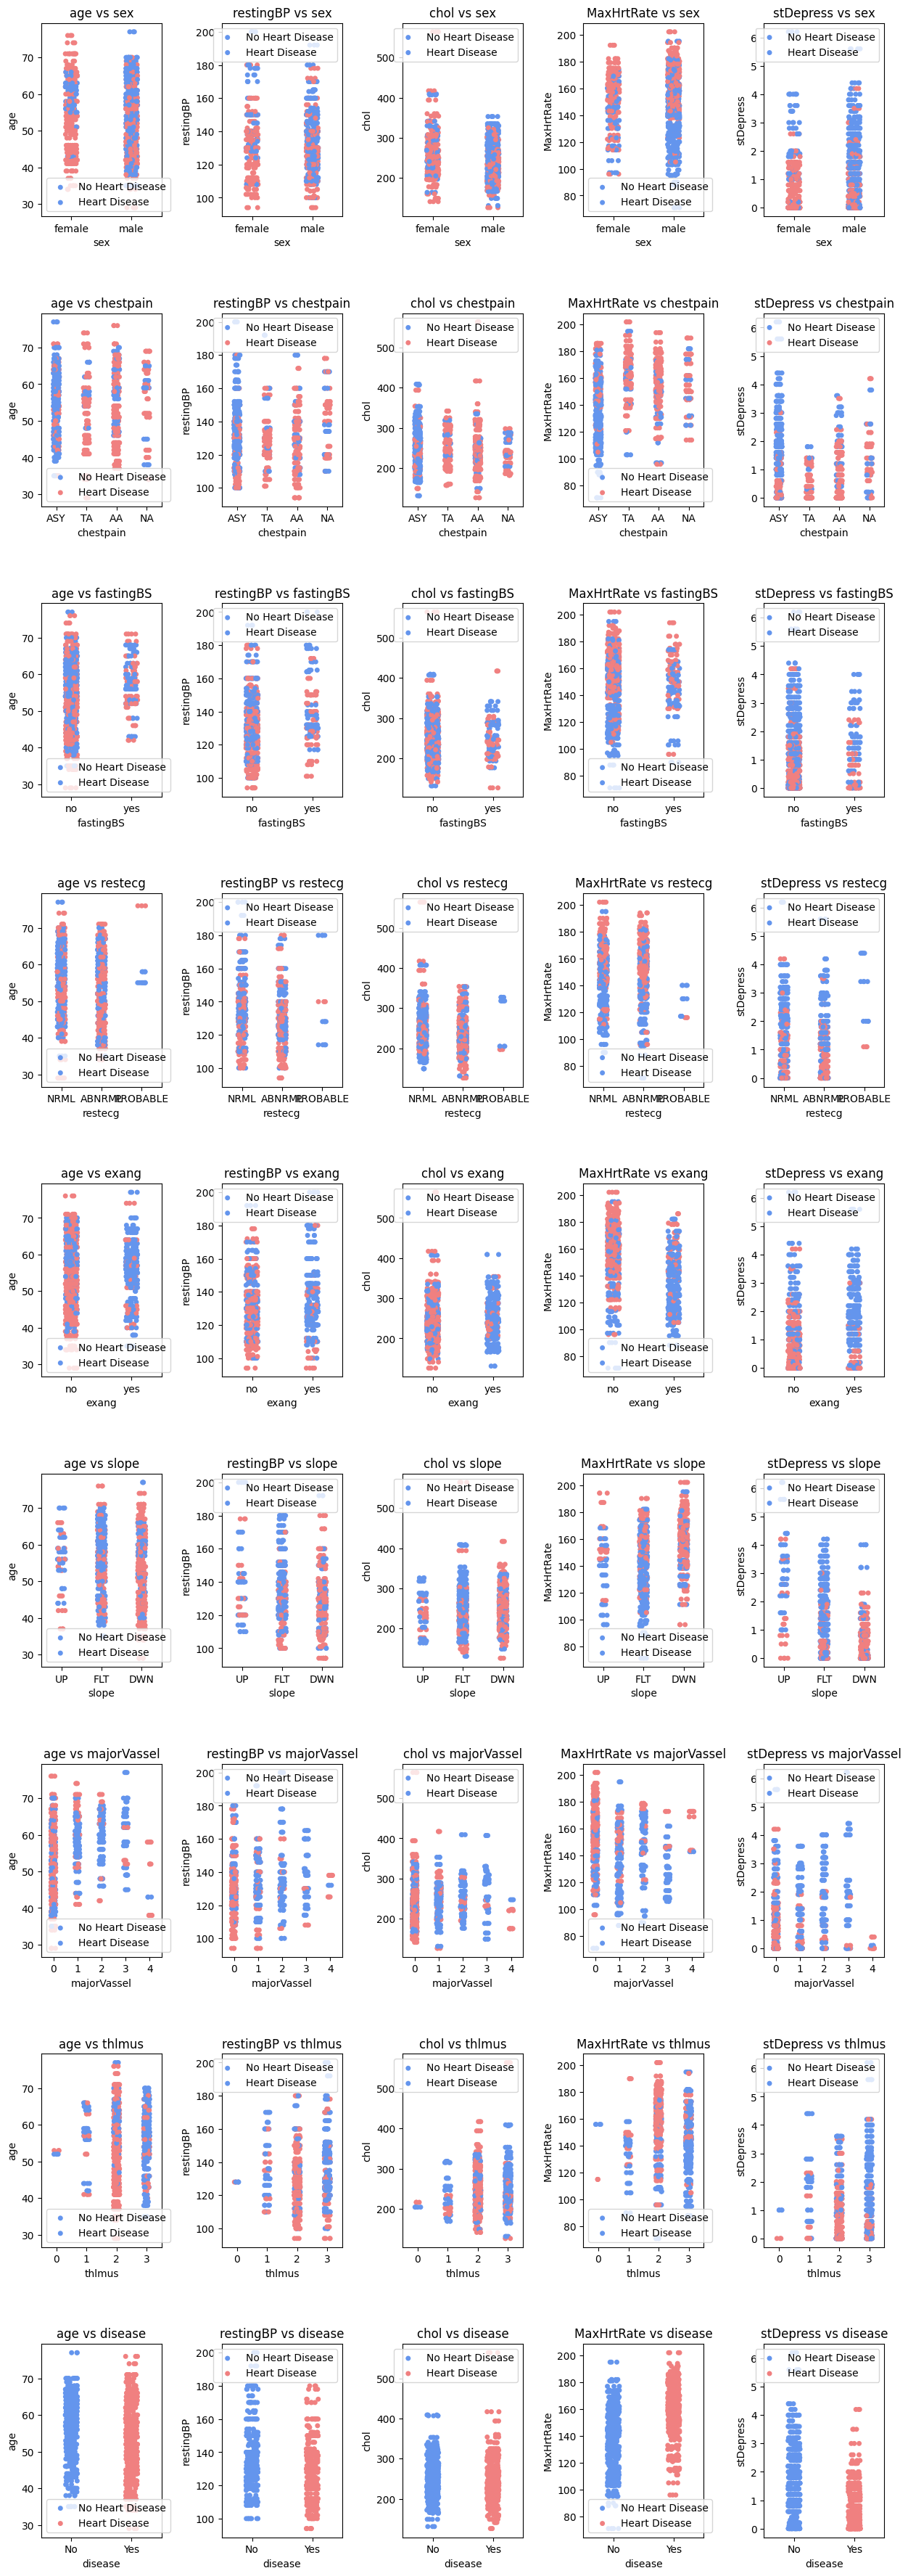

In [72]:

# Set the figure size
plt.figure(figsize=(15, 5*len(category)))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)
# Loop through the categories
for i, cat in enumerate(category):
    # Loop through the numerical variables
    for k, num in enumerate(numerical):
        # Set the subplot position
        plt.subplot(len(category), len(numerical), i*len(numerical) + k + 1)
        # Plot the stripplot
        sns.stripplot(x=f[cat], y=num, data=f, hue=f['disease'], palette=colors)
        # Add the legend and title
        plt.legend(['No Heart Disease', 'Heart Disease'])
        title = num + f' vs {cat}' 
        plt.title(title)

# Show the plot
plt.show()


In [13]:
import numpy as np

# Load the data into a NumPy array
#data = np.loadtxt('data.csv', delimiter=',', skiprows=1)

# Select the "bp" column and sort the values
bp = f['chol']
bp = np.sort(bp)

# Calculate the first quartile (Q1), second quartile (Q2), and third quartile (Q3)
Q1, Q2, Q3 = np.percentile(bp, [25, 50, 75])

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f['disease'][f['chol'] > upper_bound].value_counts())
print(f['disease'][f['chol'] < lower_bound].value_counts())


Yes    9
No     7
Name: disease, dtype: int64
No     0
Yes    0
Name: disease, dtype: int64
